In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 
import seaborn as sns

In [2]:
data_sucio = pd.read_csv('DataAnalytics.csv')
data_sucio.head(5)

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,fecha,Juego,auto push,tiempo de lección,tiempo de sesión
0,nicolas,nicolas,1.0,5.399169,Despegue,1.0,blue,Episodio 1,25/01/2024 09:26:42 a. m.,Astro,0.0,0.0,0.0
1,nicolas,nicolas,0.0,1.283400,Despegue,2.0,violet,Episodio 1,25/01/2024 09:26:46 a. m.,Astro,0.0,0.0,0.0
2,nicolas,nicolas,1.0,2.700226,Despegue,3.0,green,Episodio 1,25/01/2024 09:26:48 a. m.,Astro,0.0,0.0,0.0
3,nicolas,nicolas,0.0,3.050262,Despegue,4.0,green,Episodio 1,25/01/2024 09:26:57 a. m.,Astro,0.0,0.0,0.0
4,nicolas,nicolas,0.0,4.750256,Despegue,5.0,green,Episodio 1,25/01/2024 09:26:58 a. m.,Astro,0.0,0.0,0.0


In [3]:
data_sucio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Administrador          5865 non-null   object 
 1   Usuario                5865 non-null   object 
 2   botón correcto         5103 non-null   float64
 3   tiempo de interacción  5103 non-null   float64
 4   mini juego             5709 non-null   object 
 5   número de interacción  5103 non-null   float64
 6   color presionado       5103 non-null   object 
 7   dificultad             5865 non-null   object 
 8   fecha                  5865 non-null   object 
 9   Juego                  5865 non-null   object 
 10  auto push              5103 non-null   float64
 11  tiempo de lección      5688 non-null   float64
 12  tiempo de sesión       5259 non-null   float64
dtypes: float64(6), object(7)
memory usage: 595.8+ KB


# Limpieza de datos nulos

In [4]:
data_cuanti=data_sucio.select_dtypes(include=["float64","int64","float","int"])
data_cuali=data_sucio.select_dtypes(include=["object","datetime","category","datetime64[ns]"])
data_cuali.info()
data_cuanti.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Administrador     5865 non-null   object
 1   Usuario           5865 non-null   object
 2   mini juego        5709 non-null   object
 3   color presionado  5103 non-null   object
 4   dificultad        5865 non-null   object
 5   fecha             5865 non-null   object
 6   Juego             5865 non-null   object
dtypes: object(7)
memory usage: 320.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   botón correcto         5103 non-null   float64
 1   tiempo de interacción  5103 non-null   float64
 2   número de interacción  5103 non-null   float64
 3   auto push              5103 non-null   float64
 4   tiempo de lecci

In [5]:
cualis_bfill=data_cuali.fillna(method="bfill")
cualis_ffill=data_cuali.fillna(method="ffill")
cuantias_mean=data_cuanti.fillna(round(data_cuanti.mean(),1))

data_sin_nulos = pd.concat([cuantias_mean,cualis_ffill],axis=1)

data_sin_nulos

C:\Users\B_3mi\AppData\Local\Temp\ipykernel_6400\1919879999.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualis_bfill=data_cuali.fillna(method="bfill")
C:\Users\B_3mi\AppData\Local\Temp\ipykernel_6400\1919879999.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualis_ffill=data_cuali.fillna(method="ffill")


,botón correcto,tiempo de interacción,número de interacción,auto push,tiempo de lección,tiempo de sesión,Administrador,Usuario,mini juego,color presionado,dificultad,fecha,Juego
0,1.0,5.399169,1.0,0.0,0.000000,0.000000,nicolas,nicolas,Despegue,blue,Episodio 1,25/01/2024 09:26:42 a. m.,Astro
1,0.0,1.283400,2.0,0.0,0.000000,0.000000,nicolas,nicolas,Despegue,violet,Episodio 1,25/01/2024 09:26:46 a. m.,Astro
2,1.0,2.700226,3.0,0.0,0.000000,0.000000,nicolas,nicolas,Despegue,green,Episodio 1,25/01/2024 09:26:48 a. m.,Astro
3,0.0,3.050262,4.0,0.0,0.000000,0.000000,nicolas,nicolas,Despegue,green,Episodio 1,25/01/2024 09:26:57 a. m.,Astro
4,0.0,4.750256,5.0,0.0,0.000000,0.000000,nicolas,nicolas,Despegue,green,Episodio 1,25/01/2024 09:26:58 a. m.,Astro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,0.5,10.000000,13.3,0.0,6.300000,332.240000,ALEIDA,ESMERALDA,Restaurante,green,Episodio 1,28/05/2024 04:15:49 p. m.,Astro
5861,0.0,2.135419,1.0,0.0,0.000000,0.000000,ALEIDA,JOSE JAVIER,Asteroides,green,Episodio 3,04/06/2024 11:09:54 a. m.,Astro
5862,0.5,10.000000,13.3,0.0,2.271806,12.400000,ALEIDA,JOSE JAVIER,Asteroides,green,Episodio 3,04/06/2024 11:09:58 a. m.,Astro
5863,0.5,10.000000,13.3,0.0,6.300000,6.478299,ALEIDA,JOSE JAVIER,Asteroides,green,Episodio 3,04/06/2024 11:09:58 a. m.,Astro


In [6]:
data=data_sin_nulos.isnull().sum().sum()
print(data)

0


# Limpieza de outliers

In [7]:
cuantitativas=data_sucio.select_dtypes(include=["float64","int64","float","int"])
cualitativas=data_sucio.select_dtypes(include=["object","datetime","category"])
y=cuantitativas

percentile25=y.quantile(0.25)
percentile75=y.quantile(0.75)
iqr= percentile75-percentile25

Limite_Superior_iqr= percentile75+1.5*iqr
Limite_Inferior_iqr= percentile25-1.5*iqr
iqr=cuantitativas[(y<=Limite_Superior_iqr)&y>=(Limite_Inferior_iqr)]
iqr2=iqr.fillna(round(iqr.mean(),1))
rango_intercuartilico=pd.concat([cualitativas,iqr2],axis=1)
rango_intercuartilico

,Administrador,Usuario,mini juego,color presionado,dificultad,fecha,Juego,botón correcto,tiempo de interacción,número de interacción,auto push,tiempo de lección,tiempo de sesión
0,nicolas,nicolas,Despegue,blue,Episodio 1,25/01/2024 09:26:42 a. m.,Astro,1.0,5.399169,1.0,0.0,0.000000,0.000000
1,nicolas,nicolas,Despegue,violet,Episodio 1,25/01/2024 09:26:46 a. m.,Astro,0.0,1.283400,2.0,0.0,0.000000,0.000000
2,nicolas,nicolas,Despegue,green,Episodio 1,25/01/2024 09:26:48 a. m.,Astro,1.0,2.700226,3.0,0.0,0.000000,0.000000
3,nicolas,nicolas,Despegue,green,Episodio 1,25/01/2024 09:26:57 a. m.,Astro,0.0,3.050262,4.0,0.0,0.000000,0.000000
4,nicolas,nicolas,Despegue,green,Episodio 1,25/01/2024 09:26:58 a. m.,Astro,0.0,4.750256,5.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,ALEIDA,ESMERALDA,NaN,NaN,Episodio 1,28/05/2024 04:15:49 p. m.,Astro,0.5,10.000000,13.3,0.0,6.300000,332.240000
5861,ALEIDA,JOSE JAVIER,Asteroides,green,Episodio 3,04/06/2024 11:09:54 a. m.,Astro,0.0,2.135419,1.0,0.0,0.000000,0.000000
5862,ALEIDA,JOSE JAVIER,Asteroides,NaN,Episodio 3,04/06/2024 11:09:58 a. m.,Astro,0.5,10.000000,13.3,0.0,2.271806,12.400000
5863,ALEIDA,JOSE JAVIER,NaN,NaN,Episodio 3,04/06/2024 11:09:58 a. m.,Astro,0.5,10.000000,13.3,0.0,6.300000,6.478299


In [8]:
cualis_bfill=data_cuali.fillna(method="bfill")
cualis_ffill=data_cuali.fillna(method="ffill")
cuantias_mean=data_cuanti.fillna(round(data_cuanti.mean(),1))

data = pd.concat([cuantias_mean,cualis_ffill],axis=1)

data

C:\Users\B_3mi\AppData\Local\Temp\ipykernel_6400\3597238304.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualis_bfill=data_cuali.fillna(method="bfill")
C:\Users\B_3mi\AppData\Local\Temp\ipykernel_6400\3597238304.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualis_ffill=data_cuali.fillna(method="ffill")


,botón correcto,tiempo de interacción,número de interacción,auto push,tiempo de lección,tiempo de sesión,Administrador,Usuario,mini juego,color presionado,dificultad,fecha,Juego
0,1.0,5.399169,1.0,0.0,0.000000,0.000000,nicolas,nicolas,Despegue,blue,Episodio 1,25/01/2024 09:26:42 a. m.,Astro
1,0.0,1.283400,2.0,0.0,0.000000,0.000000,nicolas,nicolas,Despegue,violet,Episodio 1,25/01/2024 09:26:46 a. m.,Astro
2,1.0,2.700226,3.0,0.0,0.000000,0.000000,nicolas,nicolas,Despegue,green,Episodio 1,25/01/2024 09:26:48 a. m.,Astro
3,0.0,3.050262,4.0,0.0,0.000000,0.000000,nicolas,nicolas,Despegue,green,Episodio 1,25/01/2024 09:26:57 a. m.,Astro
4,0.0,4.750256,5.0,0.0,0.000000,0.000000,nicolas,nicolas,Despegue,green,Episodio 1,25/01/2024 09:26:58 a. m.,Astro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,0.5,10.000000,13.3,0.0,6.300000,332.240000,ALEIDA,ESMERALDA,Restaurante,green,Episodio 1,28/05/2024 04:15:49 p. m.,Astro
5861,0.0,2.135419,1.0,0.0,0.000000,0.000000,ALEIDA,JOSE JAVIER,Asteroides,green,Episodio 3,04/06/2024 11:09:54 a. m.,Astro
5862,0.5,10.000000,13.3,0.0,2.271806,12.400000,ALEIDA,JOSE JAVIER,Asteroides,green,Episodio 3,04/06/2024 11:09:58 a. m.,Astro
5863,0.5,10.000000,13.3,0.0,6.300000,6.478299,ALEIDA,JOSE JAVIER,Asteroides,green,Episodio 3,04/06/2024 11:09:58 a. m.,Astro


In [9]:
outliers_limpios=data.isnull().sum().sum()
print(outliers_limpios)

0


# Convertir variables categóricas ordinales en numéricas

In [10]:
#Administrador
frecuencia_ad = data["Administrador"].value_counts().reset_index()
frecuencia_ad.columns = ["Administrador", "Frecuencia"]
frecuencia_ad

,Administrador,Frecuencia
0,ALEIDA,3260
1,nicolas,440
2,LEONARDO,371
3,DENISSE,302
4,SERGIO ANGEL,243
5,CARLOS ENRIQUE,228
6,YAEL DAVID,224
7,AUSTIN,199
8,VALENTIN,163
9,erick,158


In [11]:
data["Administrador"]=data["Administrador"].str.replace("ALEIDA","1")
data["Administrador"]=data["Administrador"].str.replace("nicolas","2")
data["Administrador"]=data["Administrador"].str.replace("LEONARDO","3")
data["Administrador"]=data["Administrador"].str.replace("DENISSE","4")
data["Administrador"]=data["Administrador"].str.replace("SERGIO ANGEL","5")
data["Administrador"]=data["Administrador"].str.replace("CARLOS ENRIQUE","6")
data["Administrador"]=data["Administrador"].str.replace("YAEL DAVID","7")
data["Administrador"]=data["Administrador"].str.replace("AUSTIN","8")
data["Administrador"]=data["Administrador"].str.replace("VALENTIN","9")
data["Administrador"]=data["Administrador"].str.replace("erick","10")
data["Administrador"]=data["Administrador"].str.replace("IKER BENJAMIN","11")
data["Administrador"]=data["Administrador"].str.replace("KYTZIA","12")
data["Administrador"]=data["Administrador"].str.replace("BENJAMIN","13")
data

,botón correcto,tiempo de interacción,número de interacción,auto push,tiempo de lección,tiempo de sesión,Administrador,Usuario,mini juego,color presionado,dificultad,fecha,Juego
0,1.0,5.399169,1.0,0.0,0.000000,0.000000,2,nicolas,Despegue,blue,Episodio 1,25/01/2024 09:26:42 a. m.,Astro
1,0.0,1.283400,2.0,0.0,0.000000,0.000000,2,nicolas,Despegue,violet,Episodio 1,25/01/2024 09:26:46 a. m.,Astro
2,1.0,2.700226,3.0,0.0,0.000000,0.000000,2,nicolas,Despegue,green,Episodio 1,25/01/2024 09:26:48 a. m.,Astro
3,0.0,3.050262,4.0,0.0,0.000000,0.000000,2,nicolas,Despegue,green,Episodio 1,25/01/2024 09:26:57 a. m.,Astro
4,0.0,4.750256,5.0,0.0,0.000000,0.000000,2,nicolas,Despegue,green,Episodio 1,25/01/2024 09:26:58 a. m.,Astro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,0.5,10.000000,13.3,0.0,6.300000,332.240000,1,ESMERALDA,Restaurante,green,Episodio 1,28/05/2024 04:15:49 p. m.,Astro
5861,0.0,2.135419,1.0,0.0,0.000000,0.000000,1,JOSE JAVIER,Asteroides,green,Episodio 3,04/06/2024 11:09:54 a. m.,Astro
5862,0.5,10.000000,13.3,0.0,2.271806,12.400000,1,JOSE JAVIER,Asteroides,green,Episodio 3,04/06/2024 11:09:58 a. m.,Astro
5863,0.5,10.000000,13.3,0.0,6.300000,6.478299,1,JOSE JAVIER,Asteroides,green,Episodio 3,04/06/2024 11:09:58 a. m.,Astro


In [12]:
#Usuario
#(ADRIAN, ALEIDA, ARLETT, ASHLEY, AUSTIN)
frecuencia_us = data["Usuario"].value_counts().reset_index()
frecuencia_us.columns = ["Usuario", "Frecuencia"]
frecuencia_us

,Usuario,Frecuencia
0,LEONARDO,546
1,ALEIDA,487
2,nicolas,440
3,JOSE JAVIER,394
4,LEONARDO,371
5,JESUS ALEJANDRO,356
6,ramiro isai,332
7,ADRIAN,280
8,SERGIO ANGEL,243
9,DENISSE,228


In [13]:

data["Usuario"]=data["Usuario"].str.replace("LEONARDO","0")
data["Usuario"]=data["Usuario"].str.replace("ALEIDA","1")
data["Usuario"]=data["Usuario"].str.replace("nicolas","0")
data["Usuario"]=data["Usuario"].str.replace("JOSE JAVIER","0")
data["Usuario"]=data["Usuario"].str.replace("JESUS ALEJANDRO","0")
data["Usuario"]=data["Usuario"].str.replace("ramiro isai","0")
data["Usuario"]=data["Usuario"].str.replace("ADRIAN","2")
data["Usuario"]=data["Usuario"].str.replace("SERGIO ANGEL","0")
data["Usuario"]=data["Usuario"].str.replace("DENISSE","0")
data["Usuario"]=data["Usuario"].str.replace("CARLOS ENRIQUE","0")
data["Usuario"]=data["Usuario"].str.replace("YAEL DAVID","0")
data["Usuario"]=data["Usuario"].str.replace("VALENTIN","0")
data["Usuario"]=data["Usuario"].str.replace("erick","0")
data["Usuario"]=data["Usuario"].str.replace("IKER BENJAMIN","0")
data["Usuario"]=data["Usuario"].str.replace("NICOLAS |","0")
data["Usuario"]=data["Usuario"].str.replace("ERICK OSVALDO","0")
data["Usuario"]=data["Usuario"].str.replace("CONCEPCION","0")
data["Usuario"]=data["Usuario"].str.replace("KYTZIA","0")
data["Usuario"]=data["Usuario"].str.replace("AUSTIN","3")
data["Usuario"]=data["Usuario"].str.replace("JOSE IGNACIO TADEO","0")
data["Usuario"]=data["Usuario"].str.replace("JOSE IAN","0")
data["Usuario"]=data["Usuario"].str.replace("ASHLEY","4")
data["Usuario"]=data["Usuario"].str.replace("JOSHUA","0")
data["Usuario"]=data["Usuario"].str.replace("YEREMI YAZMIN","0")
data["Usuario"]=data["Usuario"].str.replace("MA DEL ROSARIO","0")
data["Usuario"]=data["Usuario"].str.replace("BENJAMIN","0")
data["Usuario"]=data["Usuario"].str.replace("INGRID	","0")
data["Usuario"]=data["Usuario"].str.replace("RENE","0")
data["Usuario"]=data["Usuario"].str.replace("CARLOS ABEL","0")
data["Usuario"]=data["Usuario"].str.replace("ARLETT","5")
data["Usuario"]=data["Usuario"].str.replace("ESMERALDA","0")
data["Usuario"]=data["Usuario"].str.replace("IRVING","0")
data["Usuario"]=data["Usuario"].str.replace("jesus eduardo","0")
data


,botón correcto,tiempo de interacción,número de interacción,auto push,tiempo de lección,tiempo de sesión,Administrador,Usuario,mini juego,color presionado,dificultad,fecha,Juego
0,1.0,5.399169,1.0,0.0,0.000000,0.000000,2,0,Despegue,blue,Episodio 1,25/01/2024 09:26:42 a. m.,Astro
1,0.0,1.283400,2.0,0.0,0.000000,0.000000,2,0,Despegue,violet,Episodio 1,25/01/2024 09:26:46 a. m.,Astro
2,1.0,2.700226,3.0,0.0,0.000000,0.000000,2,0,Despegue,green,Episodio 1,25/01/2024 09:26:48 a. m.,Astro
3,0.0,3.050262,4.0,0.0,0.000000,0.000000,2,0,Despegue,green,Episodio 1,25/01/2024 09:26:57 a. m.,Astro
4,0.0,4.750256,5.0,0.0,0.000000,0.000000,2,0,Despegue,green,Episodio 1,25/01/2024 09:26:58 a. m.,Astro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,0.5,10.000000,13.3,0.0,6.300000,332.240000,1,0,Restaurante,green,Episodio 1,28/05/2024 04:15:49 p. m.,Astro
5861,0.0,2.135419,1.0,0.0,0.000000,0.000000,1,0,Asteroides,green,Episodio 3,04/06/2024 11:09:54 a. m.,Astro
5862,0.5,10.000000,13.3,0.0,2.271806,12.400000,1,0,Asteroides,green,Episodio 3,04/06/2024 11:09:58 a. m.,Astro
5863,0.5,10.000000,13.3,0.0,6.300000,6.478299,1,0,Asteroides,green,Episodio 3,04/06/2024 11:09:58 a. m.,Astro


In [14]:
#Mini juego
frecuencia_mj = data["mini juego"].value_counts().reset_index()
frecuencia_mj.columns = ["mini juego", "Frecuencia"]
frecuencia_mj

,mini juego,Frecuencia
0,Asteroides,1088
1,Restaurante,888
2,Estrellas,837
3,Gusanos,768
4,sonidos y animales,765
5,animales y colores,563
6,figuras y colores,409
7,partes del cuerpo,329
8,Despegue,197
9,MiniGame_0,8


In [15]:
data["mini juego"]=data["mini juego"].str.replace("Asteroides","1")
data["mini juego"]=data["mini juego"].str.replace("Restaurante","2")
data["mini juego"]=data["mini juego"].str.replace("Estrellas","3")
data["mini juego"]=data["mini juego"].str.replace("Gusanos","4")
data["mini juego"]=data["mini juego"].str.replace("sonidos y animales","5")
data["mini juego"]=data["mini juego"].str.replace("animales y colores","6")
data["mini juego"]=data["mini juego"].str.replace("figuras y colores","7")
data["mini juego"]=data["mini juego"].str.replace("partes del cuerpo","8")
data["mini juego"]=data["mini juego"].str.replace("Despegue","9")
data["mini juego"]=data["mini juego"].str.replace("MiniGame_0","10")
data["mini juego"]=data["mini juego"].str.replace("MiniGame_3","11")
data["mini juego"]=data["mini juego"].str.replace("MiniGame_2","12")
data["mini juego"]=data["mini juego"].str.replace("MiniGame_1","13")
data

,botón correcto,tiempo de interacción,número de interacción,auto push,tiempo de lección,tiempo de sesión,Administrador,Usuario,mini juego,color presionado,dificultad,fecha,Juego
0,1.0,5.399169,1.0,0.0,0.000000,0.000000,2,0,9,blue,Episodio 1,25/01/2024 09:26:42 a. m.,Astro
1,0.0,1.283400,2.0,0.0,0.000000,0.000000,2,0,9,violet,Episodio 1,25/01/2024 09:26:46 a. m.,Astro
2,1.0,2.700226,3.0,0.0,0.000000,0.000000,2,0,9,green,Episodio 1,25/01/2024 09:26:48 a. m.,Astro
3,0.0,3.050262,4.0,0.0,0.000000,0.000000,2,0,9,green,Episodio 1,25/01/2024 09:26:57 a. m.,Astro
4,0.0,4.750256,5.0,0.0,0.000000,0.000000,2,0,9,green,Episodio 1,25/01/2024 09:26:58 a. m.,Astro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,0.5,10.000000,13.3,0.0,6.300000,332.240000,1,0,2,green,Episodio 1,28/05/2024 04:15:49 p. m.,Astro
5861,0.0,2.135419,1.0,0.0,0.000000,0.000000,1,0,1,green,Episodio 3,04/06/2024 11:09:54 a. m.,Astro
5862,0.5,10.000000,13.3,0.0,2.271806,12.400000,1,0,1,green,Episodio 3,04/06/2024 11:09:58 a. m.,Astro
5863,0.5,10.000000,13.3,0.0,6.300000,6.478299,1,0,1,green,Episodio 3,04/06/2024 11:09:58 a. m.,Astro


In [16]:
#Color presionado
frecuencia_co = data["color presionado"].value_counts().reset_index()
frecuencia_co.columns = ["color presionado", "Frecuencia"]
frecuencia_co

,color presionado,Frecuencia
0,violet,1609
1,green,1455
2,yellow,1425
3,blue,1342
4,red,34


In [17]:
data["color presionado"]=data["color presionado"].str.replace("violet","1")
data["color presionado"]=data["color presionado"].str.replace("green","2")
data["color presionado"]=data["color presionado"].str.replace("yellow","3")
data["color presionado"]=data["color presionado"].str.replace("blue","4")
data["color presionado"]=data["color presionado"].str.replace("red","5")
data

,botón correcto,tiempo de interacción,número de interacción,auto push,tiempo de lección,tiempo de sesión,Administrador,Usuario,mini juego,color presionado,dificultad,fecha,Juego
0,1.0,5.399169,1.0,0.0,0.000000,0.000000,2,0,9,4,Episodio 1,25/01/2024 09:26:42 a. m.,Astro
1,0.0,1.283400,2.0,0.0,0.000000,0.000000,2,0,9,1,Episodio 1,25/01/2024 09:26:46 a. m.,Astro
2,1.0,2.700226,3.0,0.0,0.000000,0.000000,2,0,9,2,Episodio 1,25/01/2024 09:26:48 a. m.,Astro
3,0.0,3.050262,4.0,0.0,0.000000,0.000000,2,0,9,2,Episodio 1,25/01/2024 09:26:57 a. m.,Astro
4,0.0,4.750256,5.0,0.0,0.000000,0.000000,2,0,9,2,Episodio 1,25/01/2024 09:26:58 a. m.,Astro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,0.5,10.000000,13.3,0.0,6.300000,332.240000,1,0,2,2,Episodio 1,28/05/2024 04:15:49 p. m.,Astro
5861,0.0,2.135419,1.0,0.0,0.000000,0.000000,1,0,1,2,Episodio 3,04/06/2024 11:09:54 a. m.,Astro
5862,0.5,10.000000,13.3,0.0,2.271806,12.400000,1,0,1,2,Episodio 3,04/06/2024 11:09:58 a. m.,Astro
5863,0.5,10.000000,13.3,0.0,6.300000,6.478299,1,0,1,2,Episodio 3,04/06/2024 11:09:58 a. m.,Astro


In [18]:
#Dificultad
frecuencia_di = data["dificultad"].value_counts().reset_index()
frecuencia_di.columns = ["dificultad", "Frecuencia"]
frecuencia_di

,dificultad,Frecuencia
0,Episodio 1,2357
1,Episodio 2,1493
2,Episodio 3,1292
3,Episodio 4,723


In [19]:
data["dificultad"]=data["dificultad"].str.replace("Episodio 1","1")
data["dificultad"]=data["dificultad"].str.replace("Episodio 2","2")
data["dificultad"]=data["dificultad"].str.replace("Episodio 3","3")
data["dificultad"]=data["dificultad"].str.replace("Episodio 4","4")
data

,botón correcto,tiempo de interacción,número de interacción,auto push,tiempo de lección,tiempo de sesión,Administrador,Usuario,mini juego,color presionado,dificultad,fecha,Juego
0,1.0,5.399169,1.0,0.0,0.000000,0.000000,2,0,9,4,1,25/01/2024 09:26:42 a. m.,Astro
1,0.0,1.283400,2.0,0.0,0.000000,0.000000,2,0,9,1,1,25/01/2024 09:26:46 a. m.,Astro
2,1.0,2.700226,3.0,0.0,0.000000,0.000000,2,0,9,2,1,25/01/2024 09:26:48 a. m.,Astro
3,0.0,3.050262,4.0,0.0,0.000000,0.000000,2,0,9,2,1,25/01/2024 09:26:57 a. m.,Astro
4,0.0,4.750256,5.0,0.0,0.000000,0.000000,2,0,9,2,1,25/01/2024 09:26:58 a. m.,Astro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,0.5,10.000000,13.3,0.0,6.300000,332.240000,1,0,2,2,1,28/05/2024 04:15:49 p. m.,Astro
5861,0.0,2.135419,1.0,0.0,0.000000,0.000000,1,0,1,2,3,04/06/2024 11:09:54 a. m.,Astro
5862,0.5,10.000000,13.3,0.0,2.271806,12.400000,1,0,1,2,3,04/06/2024 11:09:58 a. m.,Astro
5863,0.5,10.000000,13.3,0.0,6.300000,6.478299,1,0,1,2,3,04/06/2024 11:09:58 a. m.,Astro


In [20]:
#Juego
frecuencia_ju = data["Juego"].value_counts().reset_index()
frecuencia_ju.columns = ["Juego", "Frecuencia"]
frecuencia_ju

,Juego,Frecuencia
0,Astro,3799
1,Cadetes,2066


In [21]:
data["Juego"]=data["Juego"].str.replace("Astro","1")
data["Juego"]=data["Juego"].str.replace("Cadetes","2")
data

,botón correcto,tiempo de interacción,número de interacción,auto push,tiempo de lección,tiempo de sesión,Administrador,Usuario,mini juego,color presionado,dificultad,fecha,Juego
0,1.0,5.399169,1.0,0.0,0.000000,0.000000,2,0,9,4,1,25/01/2024 09:26:42 a. m.,1
1,0.0,1.283400,2.0,0.0,0.000000,0.000000,2,0,9,1,1,25/01/2024 09:26:46 a. m.,1
2,1.0,2.700226,3.0,0.0,0.000000,0.000000,2,0,9,2,1,25/01/2024 09:26:48 a. m.,1
3,0.0,3.050262,4.0,0.0,0.000000,0.000000,2,0,9,2,1,25/01/2024 09:26:57 a. m.,1
4,0.0,4.750256,5.0,0.0,0.000000,0.000000,2,0,9,2,1,25/01/2024 09:26:58 a. m.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,0.5,10.000000,13.3,0.0,6.300000,332.240000,1,0,2,2,1,28/05/2024 04:15:49 p. m.,1
5861,0.0,2.135419,1.0,0.0,0.000000,0.000000,1,0,1,2,3,04/06/2024 11:09:54 a. m.,1
5862,0.5,10.000000,13.3,0.0,2.271806,12.400000,1,0,1,2,3,04/06/2024 11:09:58 a. m.,1
5863,0.5,10.000000,13.3,0.0,6.300000,6.478299,1,0,1,2,3,04/06/2024 11:09:58 a. m.,1


In [22]:
data = data.apply(pd.to_numeric, errors="coerce")
data

,botón correcto,tiempo de interacción,número de interacción,auto push,tiempo de lección,tiempo de sesión,Administrador,Usuario,mini juego,color presionado,dificultad,fecha,Juego
0,1.0,5.399169,1.0,0.0,0.000000,0.000000,2,0.0,9,4,1,NaN,1
1,0.0,1.283400,2.0,0.0,0.000000,0.000000,2,0.0,9,1,1,NaN,1
2,1.0,2.700226,3.0,0.0,0.000000,0.000000,2,0.0,9,2,1,NaN,1
3,0.0,3.050262,4.0,0.0,0.000000,0.000000,2,0.0,9,2,1,NaN,1
4,0.0,4.750256,5.0,0.0,0.000000,0.000000,2,0.0,9,2,1,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,0.5,10.000000,13.3,0.0,6.300000,332.240000,1,0.0,2,2,1,NaN,1
5861,0.0,2.135419,1.0,0.0,0.000000,0.000000,1,0.0,1,2,3,NaN,1
5862,0.5,10.000000,13.3,0.0,2.271806,12.400000,1,0.0,1,2,3,NaN,1
5863,0.5,10.000000,13.3,0.0,6.300000,6.478299,1,0.0,1,2,3,NaN,1


# Analizar las correlaciones lineales (Heatmap) entre "Usuario" con respecto a las demás

In [23]:
data=data.drop(["fecha"],axis=1)
data=data.drop(["auto push"],axis=1)

In [24]:
aleida = 1
adrian = 2
austin = 3
ashley = 4
arlett = 5
ALEIDA = data[data["Usuario"] == aleida]
ADRIAN = data[data["Usuario"] == adrian]
AUSTIN = data[data["Usuario"] == austin]
ASHLEY = data[data["Usuario"] == ashley]
ARLETT = data[data["Usuario"] == arlett]


<Axes: >

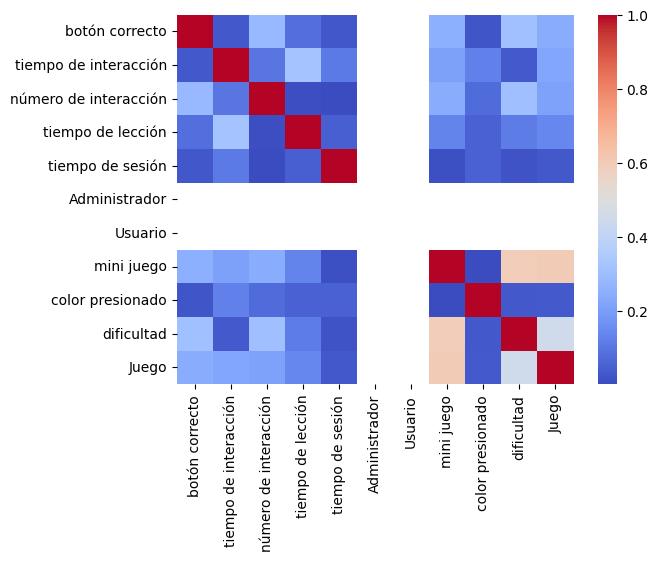

In [25]:
Corr_Factors=ALEIDA.corr()
Corr_Factors1=abs(Corr_Factors)
Heat_Map_ALEIDA=sns.heatmap(Corr_Factors1,cmap="coolwarm")
Heat_Map_ALEIDA

Las mayores correlaciones fueron: mini juego - Juego | mini juego - dificulatad

<Axes: >

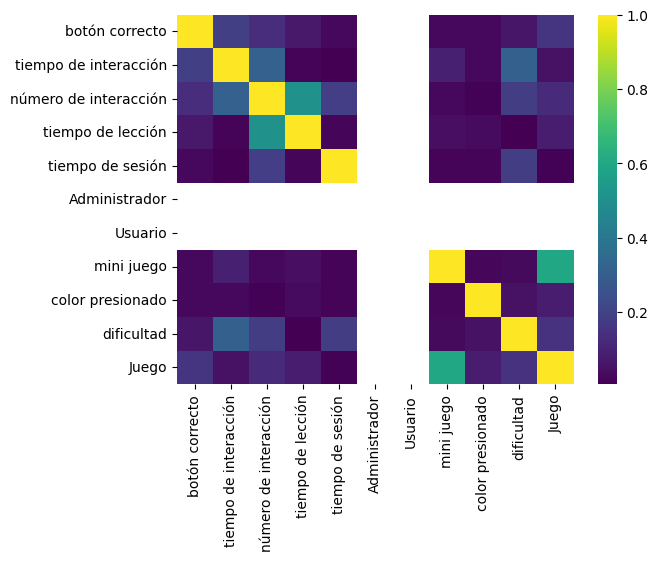

In [26]:
Corr_Factors=ADRIAN.corr()
Corr_Factors1=abs(Corr_Factors)
Heat_Map_ADRIAN=sns.heatmap(Corr_Factors1,cmap="viridis")
Heat_Map_ADRIAN

Las mayores correlaciones fueron: mini juego - Juego. Seguido de cerca por: tiempo de interacción - dificulatad | tiempo de interacción - número de interacción.

<Axes: >

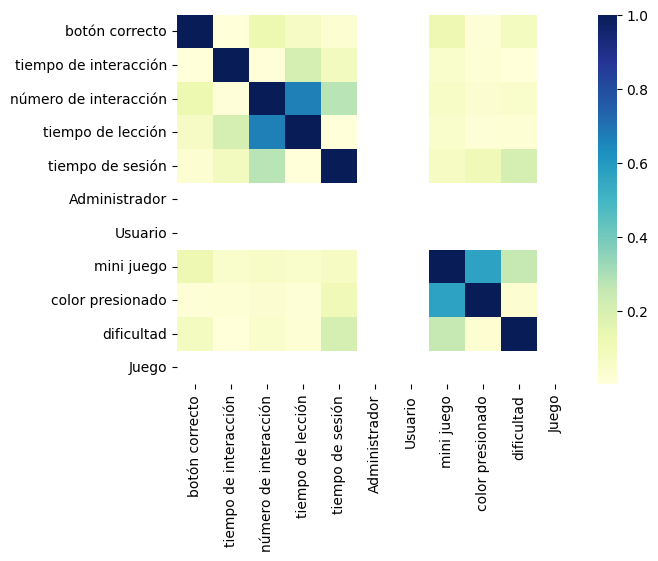

In [27]:
Corr_Factors=AUSTIN.corr()
Corr_Factors1=abs(Corr_Factors)
Heat_Map_AUSTIN=sns.heatmap(Corr_Factors1,cmap="YlGnBu")
Heat_Map_AUSTIN

La mayor correlación fue: mini juego - color presionado.

<Axes: >

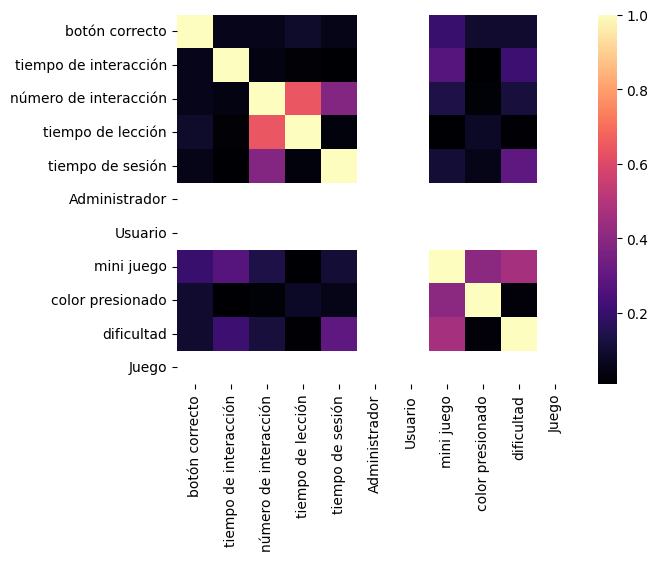

In [28]:
Corr_Factors=ASHLEY.corr()
Corr_Factors1=abs(Corr_Factors)
Heat_Map_ASHLEY=sns.heatmap(Corr_Factors1,cmap="magma")
Heat_Map_ASHLEY

La mayor correlación fue: mini juego - dificultad. Seguido de cerca por: mini juego - color presionado.

<Axes: >

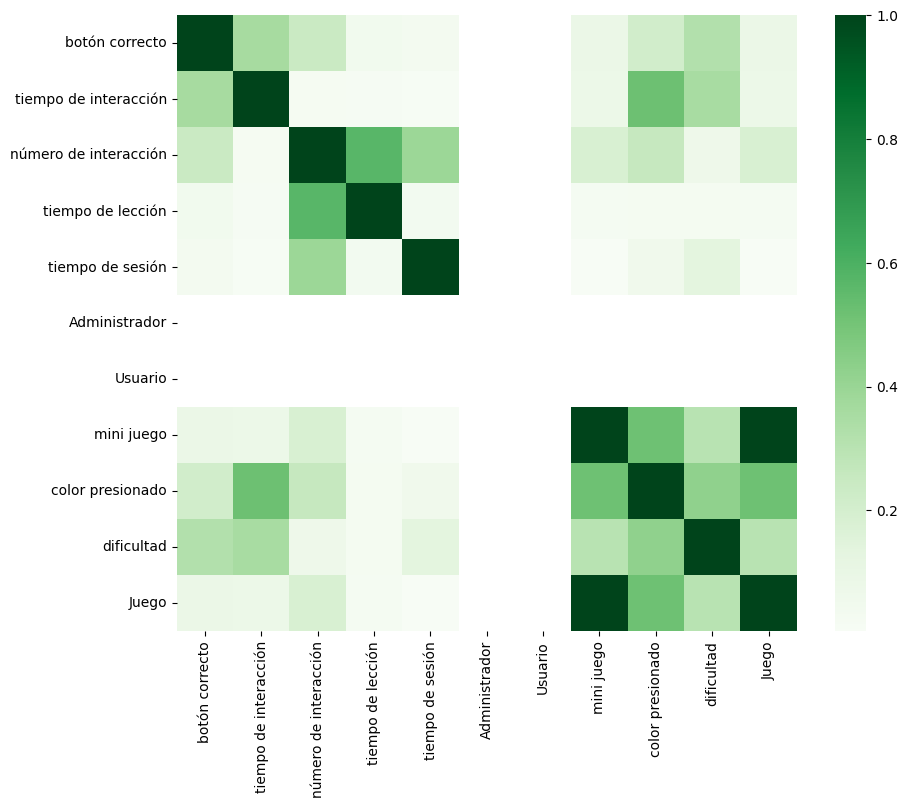

In [29]:
Corr_Factors=ARLETT.corr()
Corr_Factors1=abs(Corr_Factors)
plt.figure(figsize=(10, 8))
Heat_Map_ARLETT=sns.heatmap(Corr_Factors1,cmap="Greens")
Heat_Map_ARLETT

La mayor correlación fue: mini juego - Juego.

# Encontrar un modelo lineal múltiple que supere la mejor correlación lineal simple encontrada

In [30]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [31]:
data['Usuario'] = data['Usuario'].astype(object)

# Aplicar bfill y luego ffill
data['Usuario'] = data['Usuario'].fillna(method='bfill')
data['Usuario'] = data['Usuario'].fillna(method='ffill')

C:\Users\B_3mi\AppData\Local\Temp\ipykernel_6400\2787805870.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Usuario'] = data['Usuario'].fillna(method='bfill')
C:\Users\B_3mi\AppData\Local\Temp\ipykernel_6400\2787805870.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Usuario'] = data['Usuario'].fillna(method='bfill')
C:\Users\B_3mi\AppData\Local\Temp\ipykernel_6400\2787805870.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Usuario'] = data['Usuario'].fillna(method='ffill')


In [32]:
Vars_Indep= data[["Administrador","botón correcto","tiempo de interacción","mini juego","número de interacción","color presionado","dificultad","Juego","tiempo de lección","tiempo de sesión"]]
Var_Dep= data["Usuario"]

In [33]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [34]:
model.score(Vars_Indep,Var_Dep)

0.04013733821604415

In [35]:
y_pred= model.predict(X=data[["Administrador","botón correcto","tiempo de interacción","mini juego","número de interacción","color presionado","dificultad","Juego","tiempo de lección","tiempo de sesión"]])
y_pred

array([0.19199212, 0.14727468, 0.18424371, ..., 0.33547098, 0.33686001,
       0.14771464])

In [36]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de Determinación",coef_Deter)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de Correlación",coef_Correl)

Coeficiente de Determinación 0.04013733821604415
Coeficiente de Correlación 0.20034305132957356


Al parecer los coeficientes no salieron muy altos como para superar a las correlaciones simples. Esto puede indicar que las variables realmente no aportan un valor real para predecir respecto al usuario.

# Generar un dataframe por cada “usuario” realizar un análisis comparativo entre los heatmap obtenidos para cada uno.

c:\Users\B_3mi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


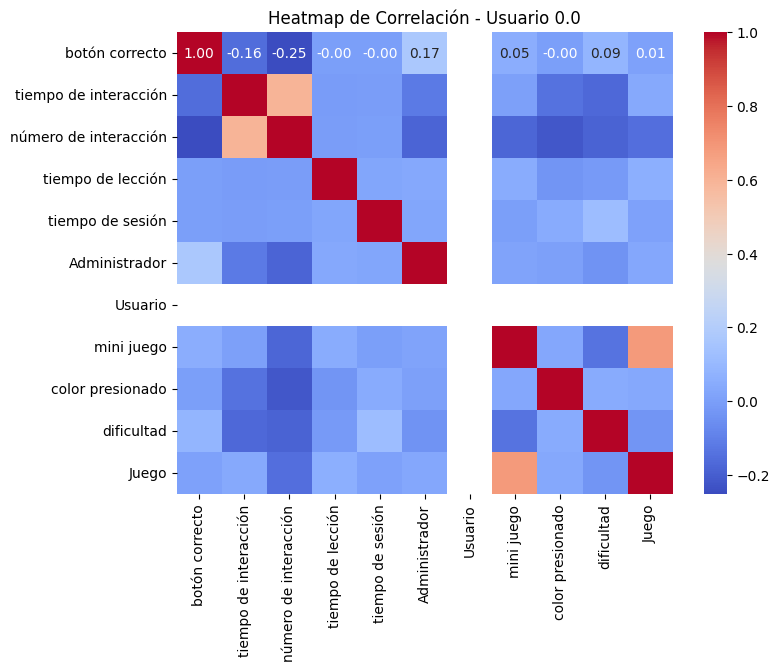

c:\Users\B_3mi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


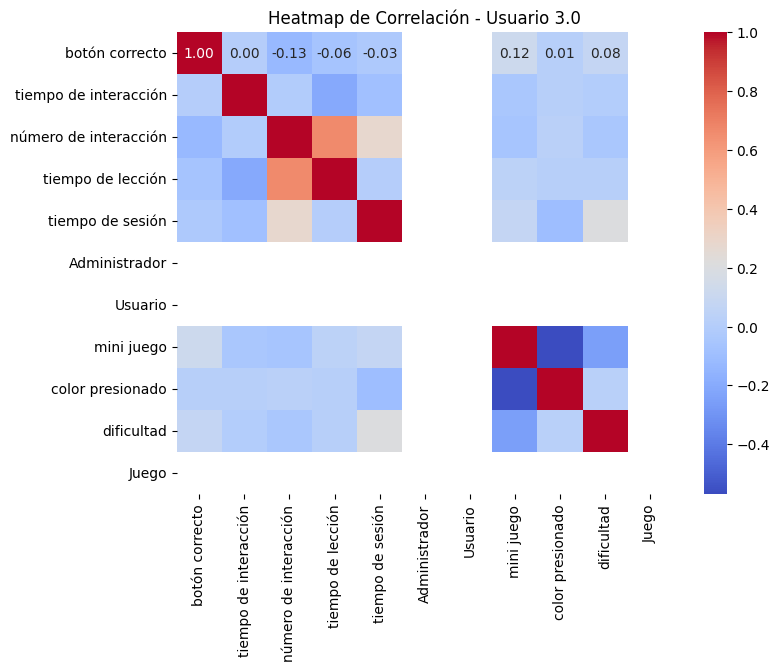

c:\Users\B_3mi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


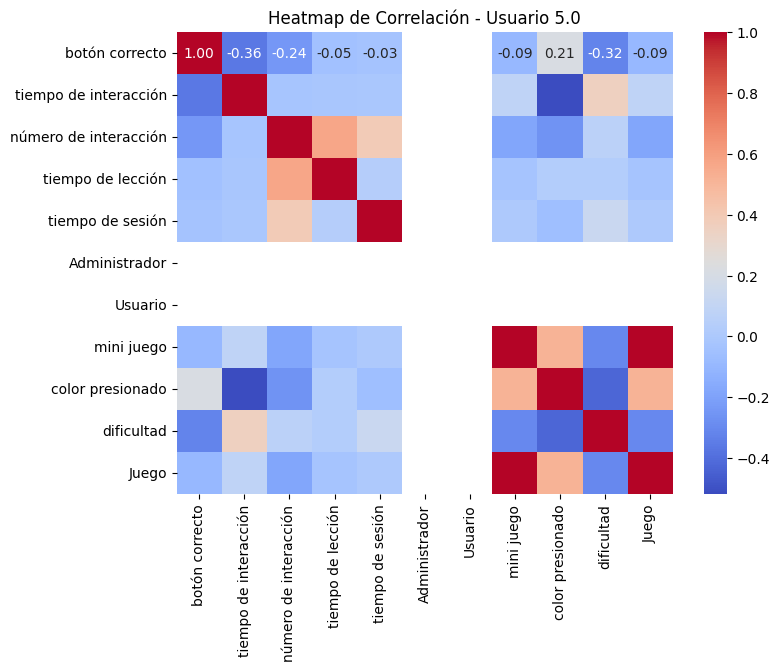

c:\Users\B_3mi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


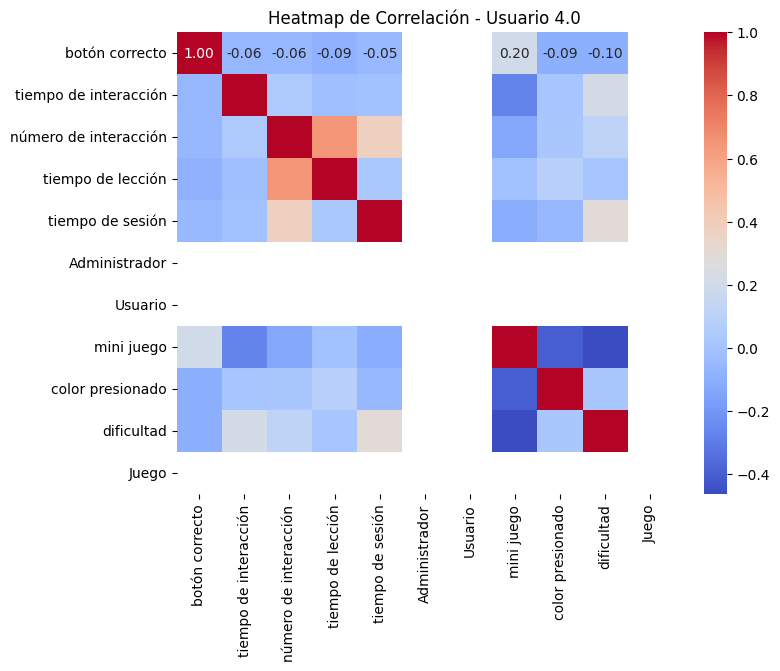

c:\Users\B_3mi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


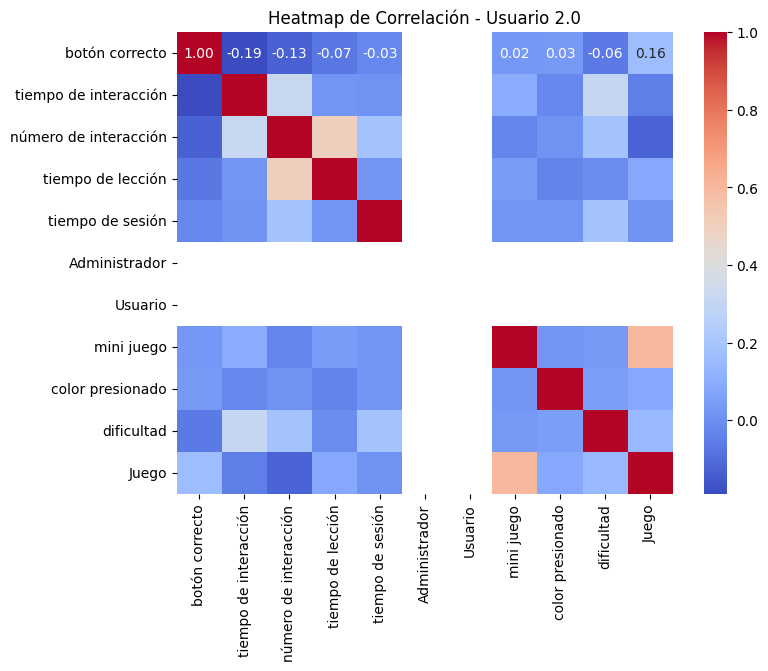

c:\Users\B_3mi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


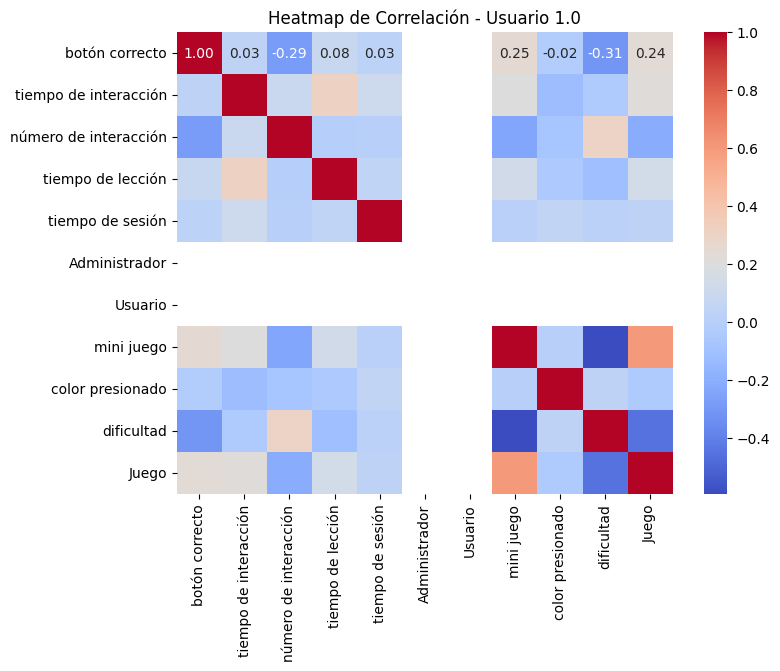

In [37]:
for usuario in data["Usuario"].unique():
    df_usuario = data[data["Usuario"] == usuario]
    corr_matrix = df_usuario.corr()
    
    plt.figure(figsize=(8,6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Heatmap de Correlación - Usuario {usuario}')
    plt.show()

Seleccionar una variable como objetivo y proponer un modelo de regresión multiple que supere las correlaciones obtenidas en los heatmap de cada usuario.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [39]:
X = data.drop(columns=["Usuario"])
y = data["Usuario"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(Vars_Indep, Var_Dep, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [41]:
coef_deter = model.score(X_test, y_test)
coef_correl = np.sqrt(coef_deter)

In [42]:
print(f"Coeficiente de Determinación (R²): {coef_deter:.4f}")
print(f"Coeficiente de Correlación (R): {coef_correl:.4f}")

# Evaluar el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")

Coeficiente de Determinación (R²): 0.0452
Coeficiente de Correlación (R): 0.2126
Error Cuadrático Medio (MSE): 0.62


In [43]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print(coef_Deter)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.03999765356731644


0.19999413383226128

Correlaciones con 'Usuario':

                       Usuario_num
Usuario_num               1.000000
Administrador             0.197205
tiempo de interacción     0.078805
número de interacción     0.053552
mini juego                0.045528
botón correcto            0.033926
Juego                     0.014637
tiempo de lección         0.010216
tiempo de sesión          0.003584
color presionado         -0.002673
dificultad               -0.134204
Usuario                  -0.861846


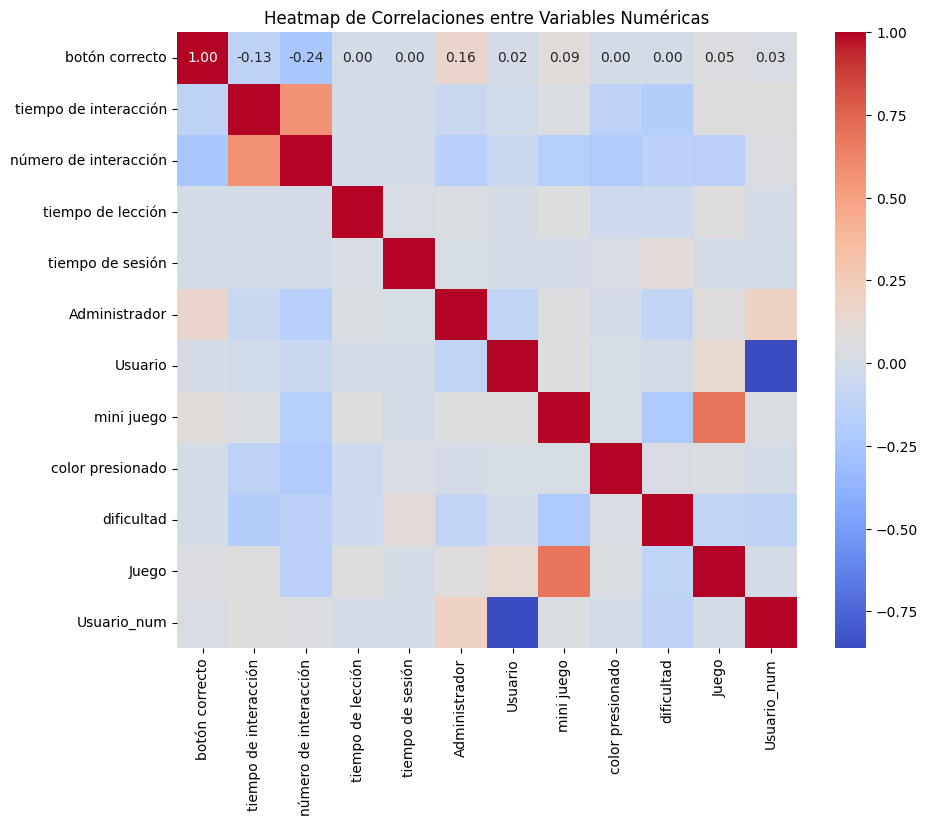

In [44]:
#Convertir la columna 'Usuario' 
usuario_freq = data['Usuario'].value_counts().to_dict()
data['Usuario_num'] = data['Usuario'].map(usuario_freq)

#Filtra columnas numéricas
df_numericas = data.select_dtypes(include=["number"])

#matriz de correlación
correlation_matrix = df_numericas.corr()

#Mostrar correlación de todas las variables con 'Usuario_num'
correlaciones_usuario = correlation_matrix[['Usuario_num']].sort_values(by='Usuario_num', ascending=False)
print("Correlaciones con 'Usuario':\n")
print(correlaciones_usuario)

#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap de Correlaciones entre Variables Numéricas")
plt.show()